In [1]:
import pandas
import matplotlib.pyplot as plt
import statistics
import seaborn
from scipy import stats

In [2]:
data = pandas.read_csv("CW - part 2/data/processed.pkl.gz")

FileNotFoundError: [Errno 2] No such file or directory: 'CW - part 2/data/processed.pkl.gz'

In [ ]:
data

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         373 non-null    int64  
 1   MRI_visit  373 non-null    object 
 2   delay      373 non-null    int64  
 3   sex        373 non-null    object 
 4   hand       373 non-null    object 
 5   age        373 non-null    int64  
 6   YOE        373 non-null    int64  
 7   SES        373 non-null    float64
 8   MMSE       373 non-null    float64
 9   CDR        373 non-null    object 
 10  eTIV       373 non-null    float64
 11  nWBV       373 non-null    float64
 12  ASF        373 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 38.0+ KB


In [22]:
data.head()

,ID,MRI_visit,delay,sex,hand,age,YOE,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,MR1,0,M,R,87,14,2.0,27.0,none,1987.0,0.696,0.883
1,1,MR2,457,M,R,88,14,2.0,30.0,none,2004.0,0.681,0.876
2,2,MR1,0,M,R,75,12,0.0,23.0,very mild,1678.0,0.736,1.046
3,2,MR2,560,M,R,76,12,0.0,28.0,very mild,1738.0,0.713,1.010
4,2,MR3,1895,M,R,77,12,0.0,22.0,very mild,1698.0,0.701,1.034


In [23]:
data.isnull().sum()

ID           0
MRI_visit    0
delay        0
sex          0
hand         0
age          0
YOE          0
SES          0
MMSE         0
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [24]:
data.describe()

,ID,delay,age,YOE,SES,MMSE,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,73.796247,595.104558,76.262735,14.597855,2.335121,27.195710,1480.670241,0.729568,1.185517
std,43.901665,635.485118,7.478329,2.876339,1.230340,4.182244,206.881001,0.037135,0.174351
min,1.000000,0.000000,60.000000,6.000000,0.000000,0.000000,0.000000,0.644000,0.000000
25%,36.000000,0.000000,71.000000,12.000000,1.000000,27.000000,1357.000000,0.700000,1.094000
50%,71.000000,552.000000,76.000000,15.000000,2.000000,29.000000,1470.000000,0.729000,1.193000
75%,112.000000,873.000000,81.000000,16.000000,3.000000,30.000000,1597.000000,0.756000,1.293000
max,150.000000,2639.000000,97.000000,23.000000,5.000000,30.000000,2004.000000,0.837000,1.587000


In [35]:
# see if the mean SES of each age shows any pattern
g = data.groupby("age")
g.SES.aggregate(statistics.mean)

age
60    2.500000
61    2.000000
62    2.500000
63    2.666667
64    2.000000
65    2.250000
66    2.300000
67    2.500000
68    2.384615
69    2.666667
70    2.777778
71    2.526316
72    2.500000
73    2.428571
74    2.300000
75    1.857143
76    1.882353
77    1.882353
78    2.578947
79    2.400000
80    1.833333
81    1.823529
82    2.450000
83    2.533333
84    2.555556
85    2.750000
86    3.000000
87    2.833333
88    3.166667
89    2.555556
90    2.000000
91    2.000000
92    1.000000
93    1.500000
94    1.500000
96    1.000000
97    1.000000
Name: SES, dtype: float64

In [40]:
# have a look if SES level has any correlation with sex
data.groupby("sex").SES.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,213.0,2.399061,1.171758,0.0,2.0,2.0,3.0,5.0
M,160.0,2.250000,1.303117,0.0,1.0,2.0,4.0,4.0


In [42]:
seaborn.set_style("whitegrid")
seaborn.set_context("paper")
seaborn.set_palette("deep", color_codes=True)

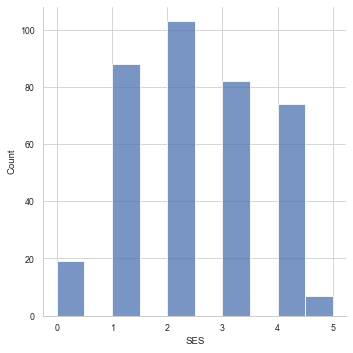

In [63]:
grid = seaborn.displot(x="SES", data=data)

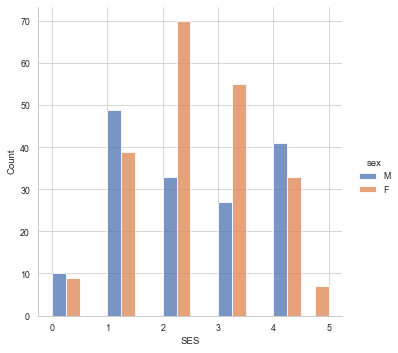

In [131]:
grid = seaborn.displot(x="SES", hue="sex", multiple="dodge", data=data)

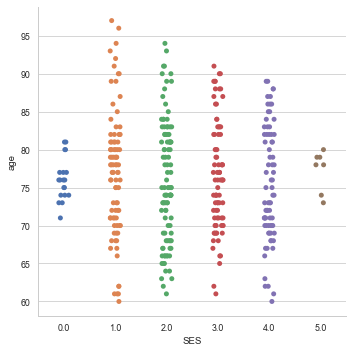

In [91]:
grid = seaborn.catplot(x="SES", y="age", data=data)

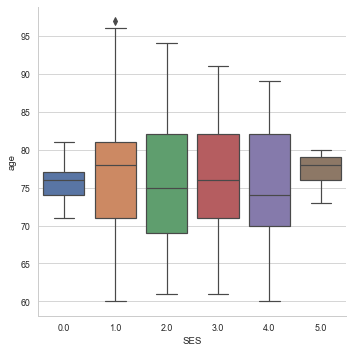

In [129]:
grid = seaborn.catplot(x="SES", y="age", kind="box", data=data)

C:\Users\umihu\anaconda3\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try swarmplot
  warnings.warn(msg, UserWarning)


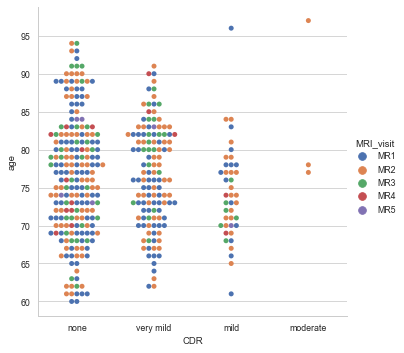

In [145]:
grid = seaborn.catplot(x="CDR", y="age", hue="MRI_visit",kind="swarm", data=data, ax=p)

<AxesSubplot:xlabel='SES', ylabel='age'>

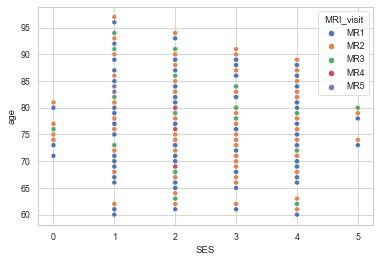

In [148]:
fig, p = plt.subplots()
seaborn.scatterplot(x="SES", y="age", hue="MRI_visit", data=data, ax=p)

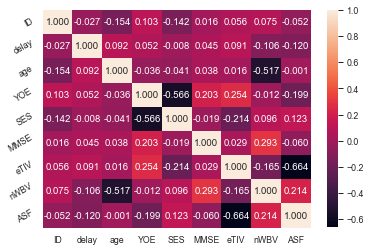

In [143]:
fig, p = plt.subplots()
seaborn.heatmap(data.corr(), annot=True, fmt=".3f", ax=p)
for label in p.get_yticklabels():
    label.set_rotation(30)

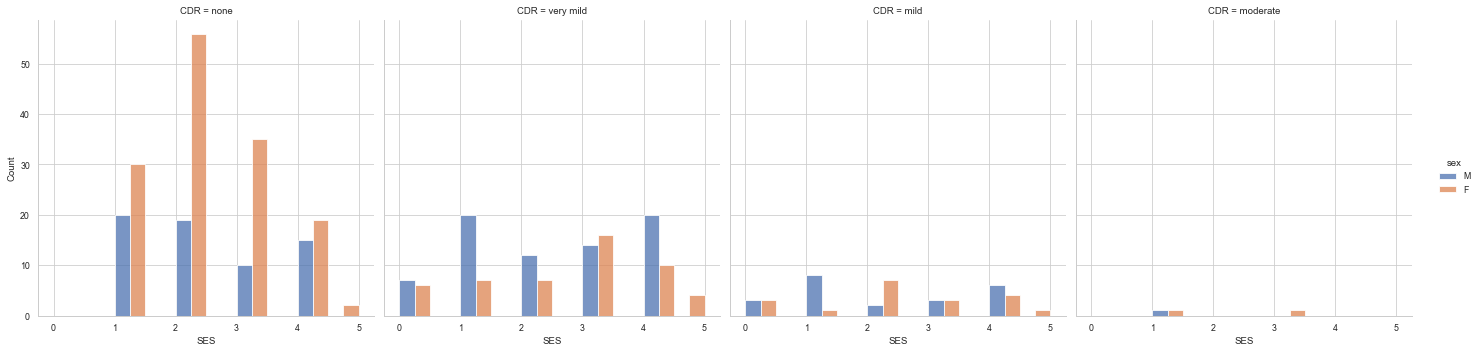

In [186]:
grid = seaborn.displot(x="SES", hue="sex", multiple="dodge", col="CDR", data=data)

In [187]:
grid.savefig("CW - part 2/results/SES-SEX-CDRfacetgridcorr.png", dpi=150, bbox_inches="tight")